In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [2]:
data = pd.read_csv('income.csv')
data.head()
# y.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print("Пропущенные элементы")
data.isnull().sum()

Пропущенные элементы


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

<AxesSubplot:>

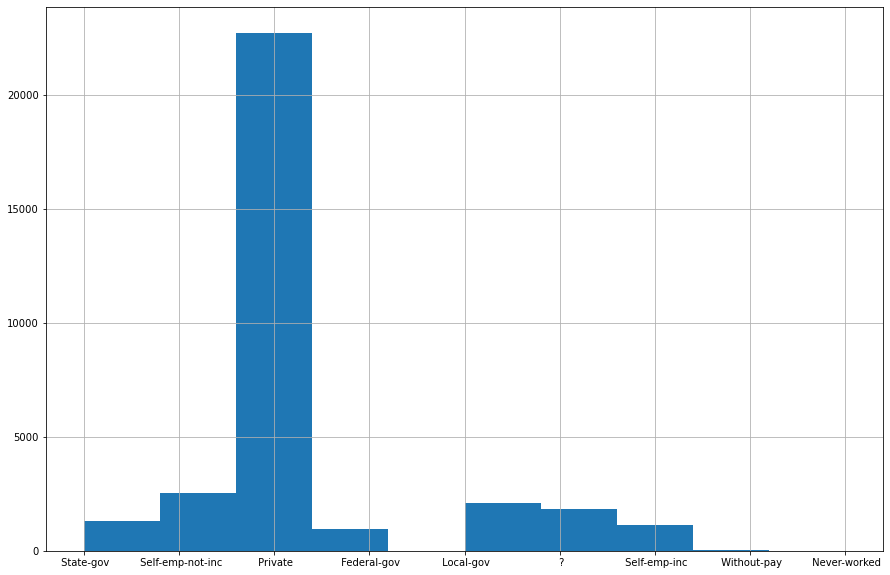

In [4]:
data['workclass'].hist(figsize=(15,10))

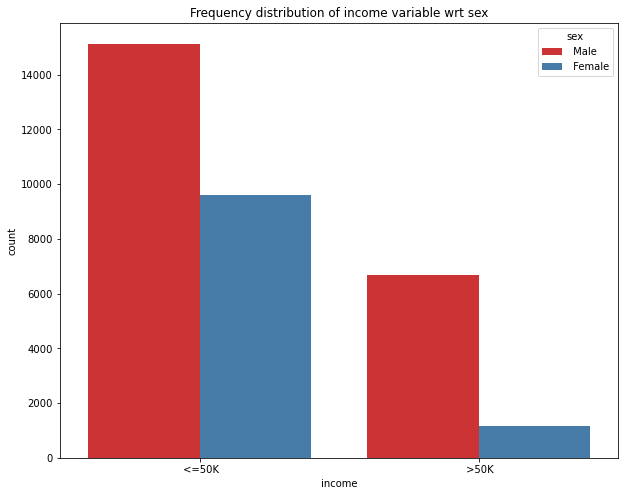

In [5]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income",  data=data, hue="sex", palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

/home/aidar/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


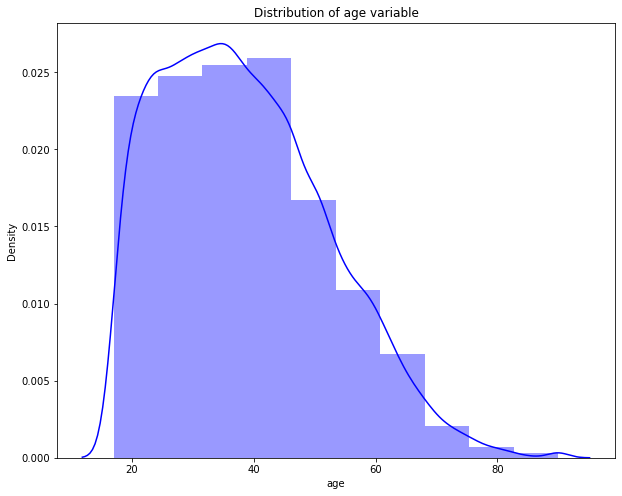

In [6]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

/home/aidar/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


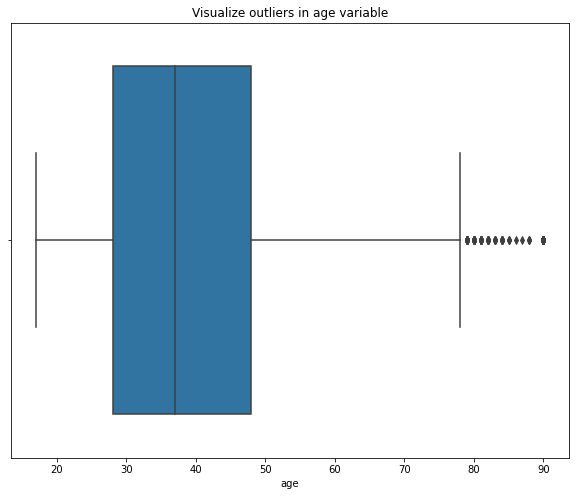

In [7]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

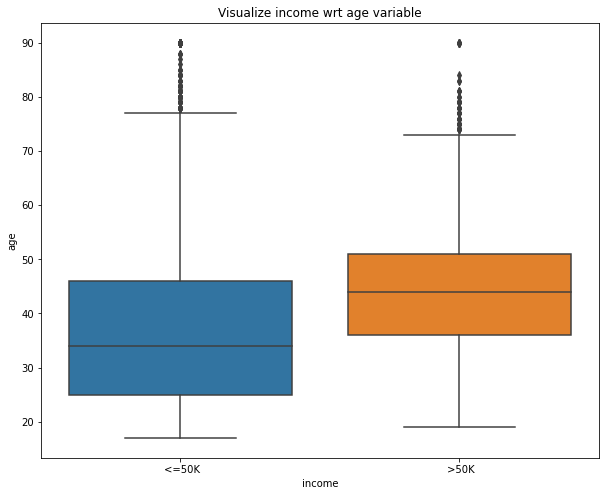

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

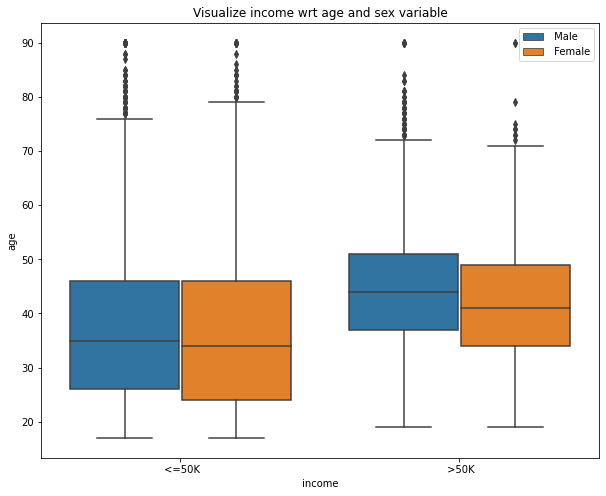

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="income", y="age", hue="sex", data=data)
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

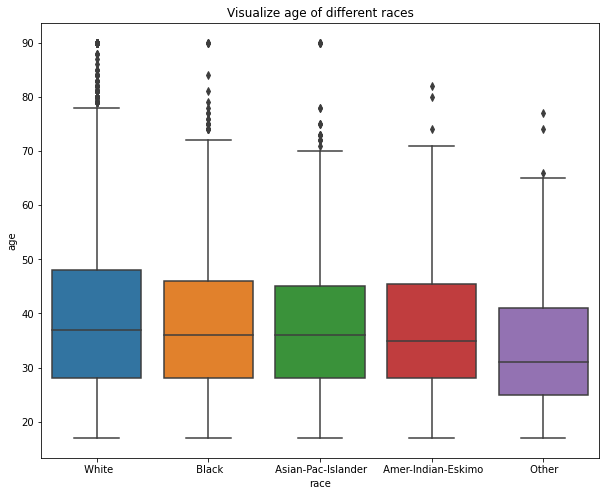

In [10]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="race", y="age", data=data)
ax.set_title("Visualize age of different races")
plt.show()

In [11]:
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


In [12]:
data.replace(' ?', np.NaN, inplace=True)

In [13]:
categorical = [var for var in data.columns if data[var].dtype=='O']
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
y = pd.get_dummies(data.income).iloc[:,1]
te = TargetEncoder(return_df=True)
newData = te.fit_transform(data[categorical],y)
for i in categorical:
    data[i] = newData[i]
data.head()

/home/aidar/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245835,0.0
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245835,0.0
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245835,0.0
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245835,0.0
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,0.12388,0.109461,0,0,40,0.263158,0.0


In [15]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size =0.3, shuffle = True)

# Модель решающих деревьев

In [17]:
kf = KFold(n_splits=5,shuffle=True)
score = []
accuracy = []
for k in range(5,51):
    clf = DecisionTreeClassifier(random_state=241,max_depth=k)
    score = cross_val_score(clf, X,y, cv=kf, scoring = "f1")
    accuracy.append(score.mean())

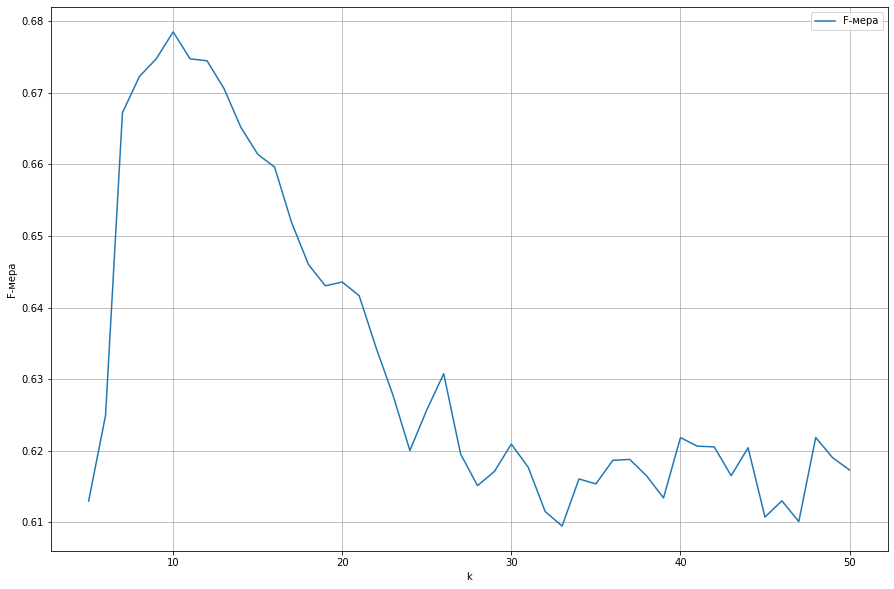

In [18]:
depth = range(5,51)
plt.figure(figsize = [15,10])
plt.plot(depth,accuracy)
plt.grid("on")
plt.xlabel('k')
plt.ylabel('F-мера')
plt.legend(["F-мера"])

In [19]:
maxF = max(accuracy)
maxInd = accuracy.index(maxF)
print("Максимально езначение F-меры %f, достигается при depth = %d" %(maxF, 5+maxInd))

Максимально езначение F-меры 0.678465, достигается при depth = 10


In [21]:
clf = DecisionTreeClassifier(random_state=241,max_depth=10)
clf = clf.fit(X_train, y_train)

In [22]:
confusion_matrix1 = confusion_matrix(y_test, clf.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix1,  columns  =  ['predicted >50', 
'predicted <50'], index = ['actual >50', 'actual <50']) 

,predicted >50,predicted <50
actual >50,6916,485
actual <50,898,1470


# Модель случайного леса

In [23]:
kf = KFold(n_splits=5,shuffle=True)
score = []
accuracy = []
for k in range(1,51):
    clf = RandomForestClassifier(random_state=241,n_estimators=k)
    score = cross_val_score(clf, X,y, cv=kf, scoring = "f1")
    accuracy.append(score.mean())

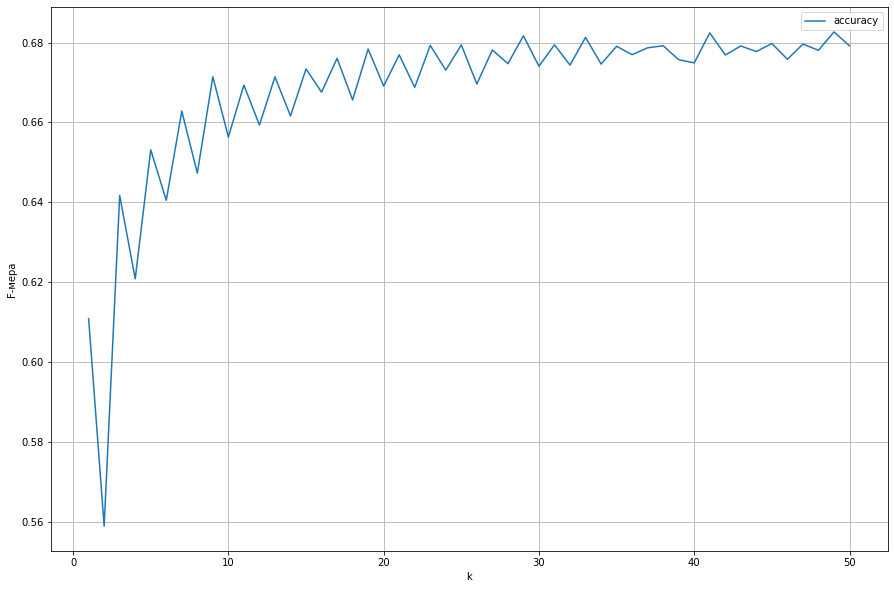

In [24]:
n_estim = range(1,51)
plt.figure(figsize = [15,10])
plt.plot(n_estim,accuracy)
plt.grid("on")
plt.xlabel('k')
plt.ylabel('F-мера')
plt.legend(["accuracy"])

In [25]:
maxF = max(accuracy)
maxInd = accuracy.index(maxF)
print("Максимально езначение F-меры %f, достигается при depth = %d" %(maxF, maxInd))

Максимально езначение F-меры 0.682652, достигается при depth = 48


In [26]:
clf = RandomForestClassifier(random_state=241,n_estimators=48)
clf = clf.fit(X_train, y_train)

In [27]:
confusion_matrix1 = confusion_matrix(y_test, clf.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix1,  columns  =  ['predicted >50', 
'predicted <50'], index = ['actual >50', 'actual <50']) 

,predicted >50,predicted <50
actual >50,6855,546
actual <50,865,1503


In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy = %f"%accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.855564


# Модель градиентного бустинга над решающими деревьями

In [29]:
kf = KFold(n_splits=5,shuffle=True)
score = []
accuracy = []
for k in range(1,100):
    model = CatBoostClassifier(n_estimators = k,loss_function='Logloss', verbose =False)
    score = cross_val_score(model, X,y, cv=kf, scoring = "f1")
    accuracy.append(score.mean())


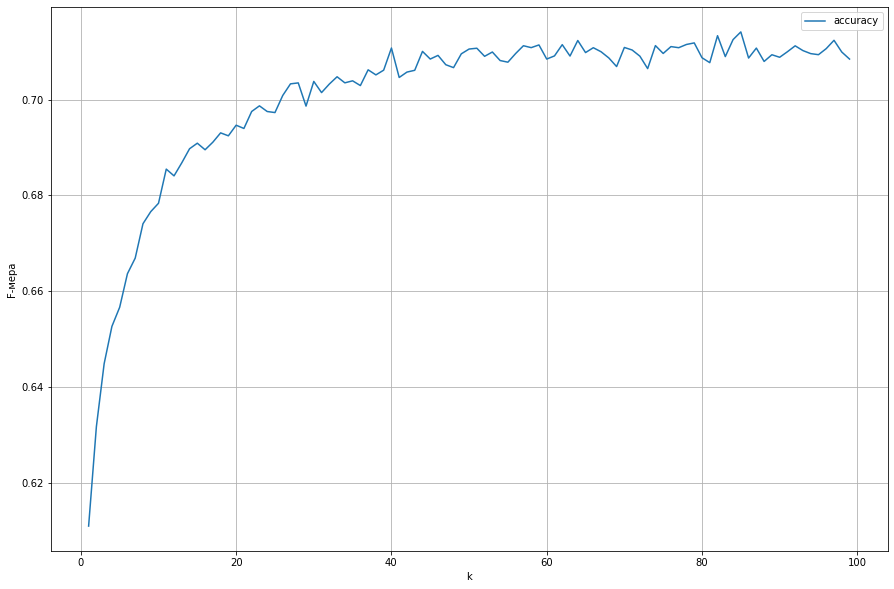

In [30]:
n_estim = range(1,100)
plt.figure(figsize = [15,10])
plt.plot(n_estim,accuracy)
plt.grid("on")
plt.xlabel('k')
plt.ylabel('F-мера')
plt.legend(["accuracy"])

In [31]:
maxF = max(accuracy)
maxInd = accuracy.index(maxF)
print("Максимально езначение F-меры %f, достигается при n_estimators = %d" %(maxF, maxInd))

Максимально езначение F-меры 0.714129, достигается при n_estimators = 84


In [32]:
clf = CatBoostClassifier(random_state=241,n_estimators=maxInd, verbose = False)
clf = clf.fit(X_train, y_train)

In [33]:
confusion_matrix1 = confusion_matrix(y_test, clf.predict(X_test)) 
pd.DataFrame(data  =  confusion_matrix1,  columns  =  ['predicted >50', 
'predicted <50'], index = ['actual >50', 'actual <50']) 

,predicted >50,predicted <50
actual >50,6947,454
actual <50,808,1560


In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy = %f"%accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.870816


# Вывод по применению алгоритмов на основе решающих деревьев
## Решаюшие деревья
Оптимальным значением глубины решающего дерева явлется значеение = 10, при этом F-мера = 0.678465
## Случайный лес
Оптимальным значением количества решающих деревьев в композиции явлется значеение = 48, при этом F-мера = 0.682652. Данное значение хоть и улучшилось, но не значительно, а также заметно, что чем больше деревьев в композиции тем лучше
## Бустинг
птимальным значением количества решающих деревьев в композиции явлется значеение = 84, при этом F-мера = 0.714129. Данное значение также улучшилось по сравнению со случайным лесом

# Модель нейронной сети для MNIST набора данных

In [4]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

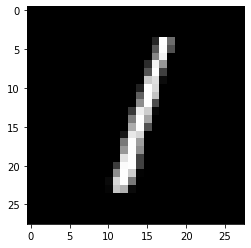

In [5]:
sample = 100
image = X_test[2]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [7]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [8]:
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy','Precision', 'Recall'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0

In [9]:
%%time
EPOCHS = 30
history = model.fit(X_train, y_train,
                    batch_size = 128, epochs = EPOCHS,
                    verbose = 0, validation_data = (X_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
CPU times: user 1min 28s, sys: 13.7 s, total: 1min 42s
Wall time: 44 s


In [13]:
history.history['accuracy']

[0.14206667244434357,
 0.2011999934911728,
 0.29963332414627075,
 0.4392833411693573,
 0.5447166562080383,
 0.6500833630561829,
 0.6969333291053772,
 0.7103999853134155,
 0.7283166646957397,
 0.753166675567627,
 0.7675333619117737,
 0.7810999751091003,
 0.7890833616256714,
 0.7982000112533569,
 0.8046166896820068,
 0.8112499713897705,
 0.8132833242416382,
 0.8172833323478699,
 0.8205833435058594,
 0.8268333077430725,
 0.8285833597183228,
 0.8288999795913696,
 0.8355166912078857,
 0.8353000283241272,
 0.8407166600227356,
 0.8430500030517578,
 0.8448666930198669,
 0.8495333194732666,
 0.8514000177383423,
 0.854283332824707]

In [211]:
y_pred = model.predict_classes(X_test)
print(y_pred[2])


1


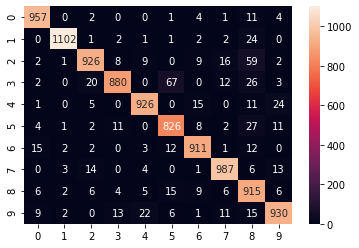

In [215]:
confusion_matrix_ = confusion_matrix(np.argmax(y_test,axis=-1), y_pred)
cm = pd.DataFrame(data = confusion_matrix_, columns = ['0', '1', '2', '3', '4',
'5', '6', '7', '8', '9'], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(cm, annot=True, fmt="d")

# Вывод по созданию нейронной сети для определения рукописных цифр
Для решения данной задачи была составлена модель нейронной сети - многослойный перцептрон. Сеть состоит из 4 слоев нейронов. Данная модель показывает хорошее качество по угадыванию цифр, что видно на матрице ошибок.